In [1]:
!where python

C:\Users\priyansh\AppData\Local\Programs\Python\Python39\python.exe
C:\Users\priyansh\AppData\Local\Microsoft\WindowsApps\python.exe


In [2]:
pip uninstall tensorflow tensorflow-gpu keras -y

Found existing installation: tensorflow 2.10.0
Uninstalling tensorflow-2.10.0:
  Successfully uninstalled tensorflow-2.10.0
Found existing installation: keras 2.10.0
Uninstalling keras-2.10.0:
  Successfully uninstalled keras-2.10.0
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow==2.10.0

  Using cached tensorflow-2.10.0-cp39-cp39-win_amd64.whl.metadata (3.1 kB)
  Using cached keras-2.10.0-py2.py3-none-any.whl.metadata (1.3 kB)
Using cached tensorflow-2.10.0-cp39-cp39-win_amd64.whl (455.9 MB)
Using cached keras-2.10.0-py2.py3-none-any.whl (1.7 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-cpu 2.8.0 requires keras<2.9,>=2.8.0rc0, but you have keras 2.10.0 which is incompatible.
tensorflow-cpu 2.8.0 requires tensorboard<2.9,>=2.8, but you have tensorboard 2.10.1 which is incompatible.

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install numpy==1.24.4 --force-reinstall

  Using cached numpy-1.24.4-cp39-cp39-win_amd64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp39-cp39-win_amd64.whl (14.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-cpu 2.8.0 requires keras<2.9,>=2.8.0rc0, but you have keras 2.10.0 which is incompatible.
tensorflow-cpu 2.8.0 requires tensorboard<2.9,>=2.8, but you have tensorboard 2.10.1 which is incompatible.

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install tensorflow matplotlib pandas opencv-python


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


 Step 1: Import Libraries

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.cm as cm

In [7]:
import shutil
import random

# Paths
original_dataset_dir = 'C:/minor project/potato_project/PlantVillage'
base_dir = 'C:/minor project/potato_project/dataset'  # New base folder where train/val/test will be created

# Create train/val/test directories
os.makedirs(base_dir, exist_ok=True)
for split in ['train', 'val', 'test']:
    for category in ['Potato___healthy', 'Potato___Early_blight', 'Potato___Late_blight']:
        os.makedirs(os.path.join(base_dir, split, category), exist_ok=True)

# Parameters
split_ratio = [0.8, 0.1, 0.1]  # 80% train, 10% val, 10% test

# For each category
for category in ['Potato___healthy', 'Potato___Early_blight', 'Potato___Late_blight']:
    category_path = os.path.join(original_dataset_dir, category)
    images = os.listdir(category_path)
    random.shuffle(images)
    
    train_size = int(len(images) * split_ratio[0])
    val_size = int(len(images) * split_ratio[1])

    train_images = images[:train_size]
    val_images = images[train_size:train_size + val_size]
    test_images = images[train_size + val_size:]

    # Move images
    for img in train_images:
        shutil.copy(os.path.join(category_path, img), os.path.join(base_dir, 'train', category, img))
    for img in val_images:
        shutil.copy(os.path.join(category_path, img), os.path.join(base_dir, 'val', category, img))
    for img in test_images:
        shutil.copy(os.path.join(category_path, img), os.path.join(base_dir, 'test', category, img))

print("✅ Data split complete!")


✅ Data split complete!


Step 2: Set Constants

In [8]:
# Constants
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 20

🛠 Step 3: Load Data (Train/Validation/Test Split)

In [9]:
# Paths
train_dir = 'C:/minor project/potato_project/dataset/train'
val_dir = 'C:/minor project/potato_project/dataset/val'
test_dir = 'C:/minor project/potato_project/dataset/test'


# 1. Data Augmentation for Train
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# 2. Data Preprocessing for Validation
val_datagen = ImageDataGenerator(rescale=1./255)

# 3. Data Preprocessing for Test
test_datagen = ImageDataGenerator(rescale=1./255)

# 4. Create Generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 2067 images belonging to 3 classes.
Found 409 images belonging to 3 classes.
Found 410 images belonging to 3 classes.


Show Class Distribution

In [10]:
# Labels
train_labels = train_generator.classes
val_labels = val_generator.classes
test_labels = test_generator.classes

class_indices = train_generator.class_indices
class_names = list(class_indices.keys())

# Counts
train_counts = pd.Series(train_labels).value_counts().sort_index()
val_counts = pd.Series(val_labels).value_counts().sort_index()
test_counts = pd.Series(test_labels).value_counts().sort_index()

train_counts.index = [class_names[i] for i in train_counts.index]
val_counts.index = [class_names[i] for i in val_counts.index]
test_counts.index = [class_names[i] for i in test_counts.index]

print("\nTraining:")
print(train_counts)
print("\nValidation:")
print(val_counts)
print("\nTesting:")
print(test_counts)



Training:
Potato___Early_blight    963
Potato___Late_blight     955
Potato___healthy         149
Name: count, dtype: int64

Validation:
Potato___Early_blight    192
Potato___Late_blight     187
Potato___healthy          30
Name: count, dtype: int64

Testing:
Potato___Early_blight    191
Potato___Late_blight     188
Potato___healthy          31
Name: count, dtype: int64


Step 4: Visualize Some Images with Their Labels

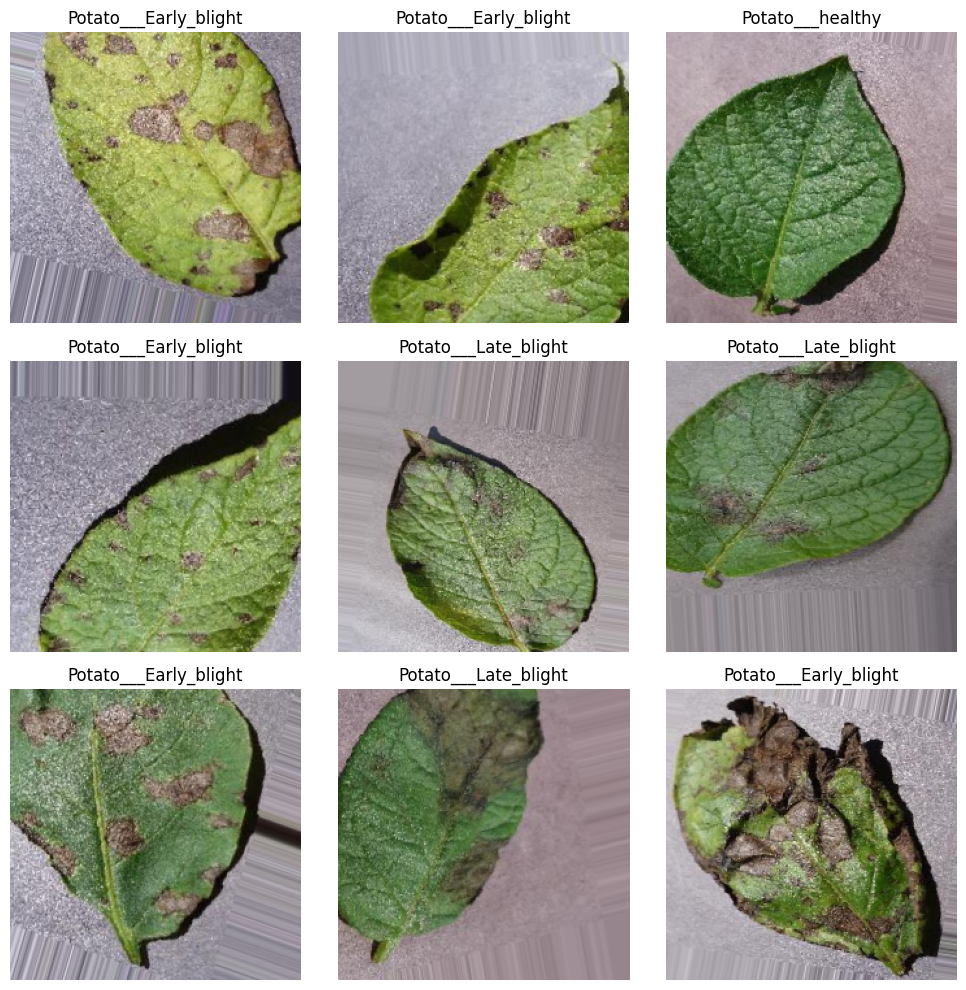

In [11]:
# Visualize training images
def show_images(generator, class_names, num_images=9):
    images, labels = next(generator)
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        label_index = np.argmax(labels[i])
        plt.title(class_names[label_index])
        plt.axis("off")
    plt.tight_layout()
    plt.show()

show_images(train_generator, class_names)


Step 5: Build CNN Model

In [9]:
cnn_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

🛠 Step 6: Train CNN Model

In [10]:
cnn_history = cnn_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


Epoch 1/10
54/54 [==============================] - 64s 1s/step - loss: 1.1238 - accuracy: 0.4724 - val_loss: 0.8768 - val_accuracy: 0.4651
Epoch 2/10
54/54 [==============================] - 64s 1s/step - loss: 0.8073 - accuracy: 0.6043 - val_loss: 1.0042 - val_accuracy: 0.5628
Epoch 3/10
54/54 [==============================] - 64s 1s/step - loss: 0.6767 - accuracy: 0.7217 - val_loss: 0.4854 - val_accuracy: 0.8140
Epoch 4/10
54/54 [==============================] - 64s 1s/step - loss: 0.5543 - accuracy: 0.7850 - val_loss: 0.8311 - val_accuracy: 0.6977
Epoch 5/10
54/54 [==============================] - 117s 2s/step - loss: 0.4801 - accuracy: 0.8164 - val_loss: 1.4271 - val_accuracy: 0.5023
Epoch 6/10
54/54 [==============================] - 184s 3s/step - loss: 0.4277 - accuracy: 0.8425 - val_loss: 0.8520 - val_accuracy: 0.7163
Epoch 7/10
54/54 [==============================] - 64s 1s/step - loss: 0.4024 - accuracy: 0.8478 - val_loss: 0.3302 - val_accuracy: 0.8419
Epoch 8/10
54/54 [

📊 Step 7: Evaluate Basic CNN Model

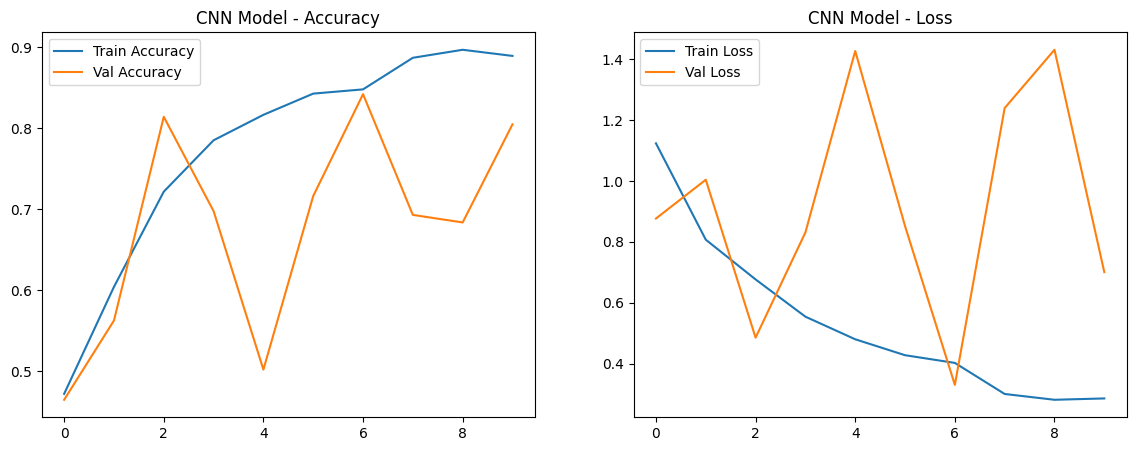

In [11]:
# Plot accuracy and loss
def plot_performance(history, model_name):
    plt.figure(figsize=(14,5))
    
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{model_name} - Loss')
    plt.legend()
    
    plt.show()

plot_performance(cnn_history, "CNN Model")


🛠 Step 8: Build Hybrid Model (Transfer Learning: MobileNetV2 + Custom Head)

In [12]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze base model

hybrid_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])

hybrid_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

hybrid_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 2,422,339
Trainable params: 164,355
Non-tr

In [17]:
hybrid_history = hybrid_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Epoch 1/10
54/54 [==============================] - 39s 717ms/step - loss: 0.1077 - accuracy: 0.9628 - val_loss: 0.0794 - val_accuracy: 0.9581
Epoch 2/10
54/54 [==============================] - 40s 735ms/step - loss: 0.0900 - accuracy: 0.9599 - val_loss: 0.0718 - val_accuracy: 0.9721
Epoch 3/10
54/54 [==============================] - 41s 754ms/step - loss: 0.0636 - accuracy: 0.9756 - val_loss: 0.0691 - val_accuracy: 0.9767
Epoch 4/10
54/54 [==============================] - 40s 747ms/step - loss: 0.0786 - accuracy: 0.9698 - val_loss: 0.1078 - val_accuracy: 0.9581
Epoch 5/10
54/54 [==============================] - 40s 740ms/step - loss: 0.0745 - accuracy: 0.9768 - val_loss: 0.0726 - val_accuracy: 0.9674
Epoch 6/10
54/54 [==============================] - 40s 738ms/step - loss: 0.0690 - accuracy: 0.9733 - val_loss: 0.0656 - val_accuracy: 0.9767
Epoch 7/10
54/54 [==============================] - 40s 743ms/step - loss: 0.0576 - accuracy: 0.9797 - val_loss: 0.0770 - val_accuracy: 0.9674

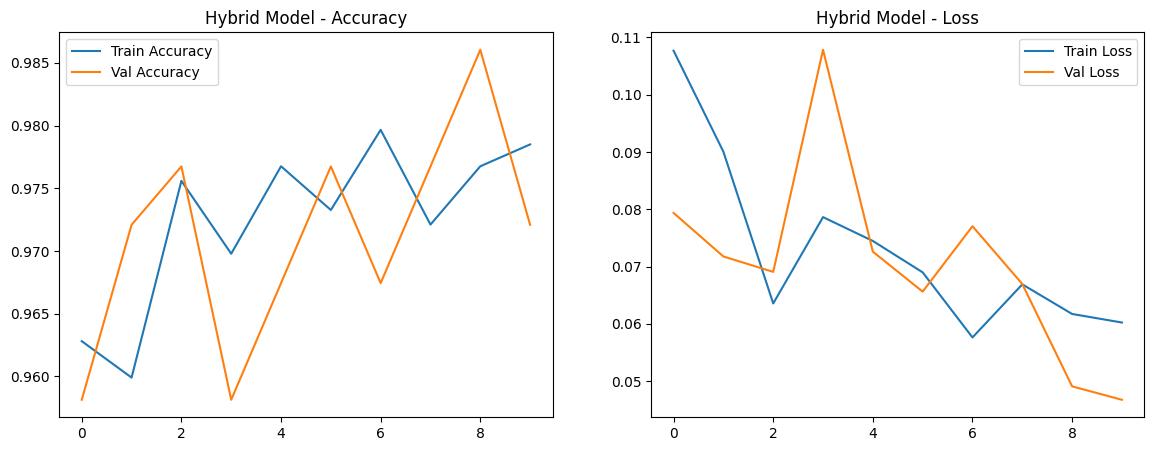

In [49]:
plot_performance(hybrid_history, "Hybrid Model")

🛠 Step 9 : Compare CNN vs Hybrid (Accuracy & Loss Graphs)

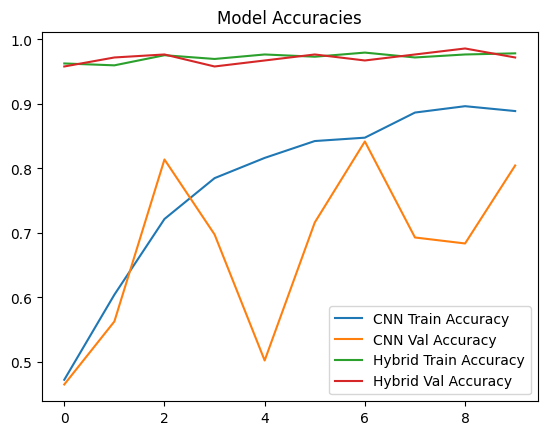

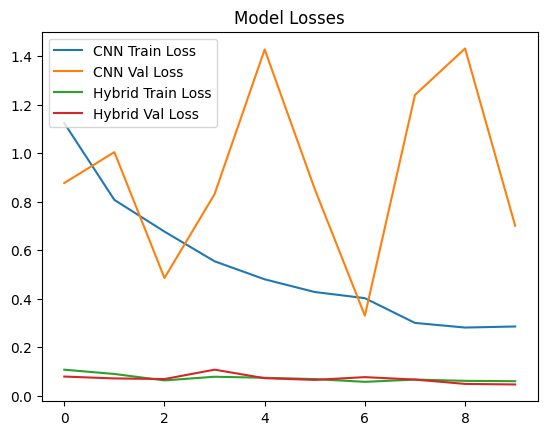

In [50]:
# Plot accuracies
plt.plot(cnn_history.history['accuracy'], label='CNN Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Val Accuracy')
plt.plot(hybrid_history.history['accuracy'], label='Hybrid Train Accuracy')
plt.plot(hybrid_history.history['val_accuracy'], label='Hybrid Val Accuracy')
plt.legend()
plt.title('Model Accuracies')
plt.show()

# Plot losses
plt.plot(cnn_history.history['loss'], label='CNN Train Loss')
plt.plot(cnn_history.history['val_loss'], label='CNN Val Loss')
plt.plot(hybrid_history.history['loss'], label='Hybrid Train Loss')
plt.plot(hybrid_history.history['val_loss'], label='Hybrid Val Loss')
plt.legend()
plt.title('Model Losses')
plt.show()


Step 10: Classification Report

In [51]:
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report

# Function to evaluate model and generate classification report
def evaluate_model(model, test_dir):
    test_datagen = ImageDataGenerator(rescale=1./255)
    test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=32, class_mode='categorical', shuffle=False)
    
    # Get predictions
    y_pred = model.predict(test_generator)
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    # Get true labels
    y_true = test_generator.classes
    
    # Classification Report
    report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys())
    return report

# Evaluate CNN Model
cnn_report = evaluate_model(cnn_model, 'dataset/test')
print("CNN Model Classification Report:")
print(cnn_report)

# Evaluate CNN-Transformer Model
hybrid_report = evaluate_model(hybrid_model, 'dataset/test')
print("CNN-MobileNetV2 Hybrid Model Classification Report:")
print(hybrid_report)

Found 216 images belonging to 3 classes.
7/7 [==============================] - 2s 240ms/step
CNN Model Classification Report:
                       precision    recall  f1-score   support

Potato___Early_blight       1.00      0.84      0.91       100
 Potato___Late_blight       0.97      0.78      0.87       100
     Potato___healthy       0.31      1.00      0.47        16

             accuracy                           0.82       216
            macro avg       0.76      0.87      0.75       216
         weighted avg       0.94      0.82      0.86       216

Found 216 images belonging to 3 classes.
7/7 [==============================] - 4s 490ms/step
CNN-MobileNetV2 Hybrid Model Classification Report:
                       precision    recall  f1-score   support

Potato___Early_blight       0.99      1.00      1.00       100
 Potato___Late_blight       0.99      0.98      0.98       100
     Potato___healthy       0.94      0.94      0.94        16

             accuracy        

🛠 Step 11: Creating Prediction Function

In [52]:
def predict_image(model, img_path, class_names):
   
    # 1. Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    
    # 2. Model prediction
    preds = model.predict(img_array)
    pred_idx = np.argmax(preds[0])
    predicted_class = class_names[pred_idx]
    confidence = preds[0][pred_idx] * 100
    
    # 3. Extract actual class from the folder name
    actual_class = os.path.basename(os.path.dirname(img_path))
    
    # 4. Print results
    print(f"Actual Class:    {actual_class}")
    print(f"Predicted Class: {predicted_class}")
    print(f"Confidence:      {confidence:.2f}%")
    
    # 5. Display the image with both labels
    plt.imshow(img)
    plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class} ({confidence:.2f}%)")
    plt.axis('off')
    plt.show()


1/1 [==============================] - 0s 46ms/step
Actual Class:    Potato___Late_blight
Predicted Class: Potato___Late_blight
Confidence:      99.63%


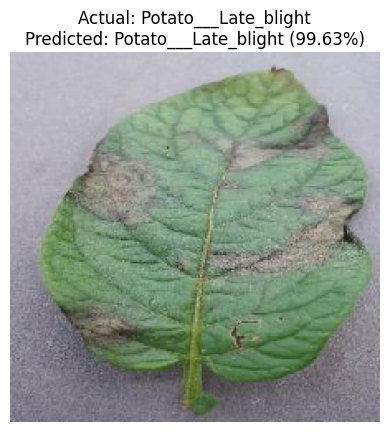

In [53]:
# Corrected img_path without extra quotes
img_path = "dataset/test/Potato___Late_blight/0396e413-e165-427a-ba72-04cbae7b8ab0___RS_LB 4751.JPG"

predict_image(hybrid_model, img_path, class_names)


1/1 [==============================] - 0s 51ms/step
Actual Class:    Potato___Late_blight
Predicted Class: Potato___Late_blight
Confidence:      95.48%


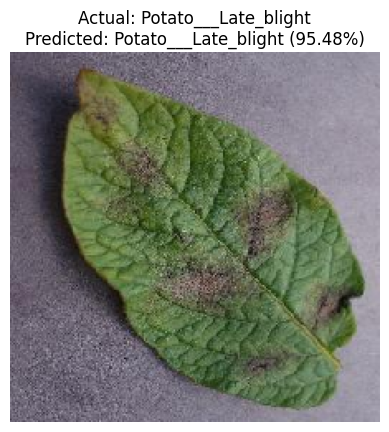

1/1 [==============================] - 0s 43ms/step
Actual Class:    Potato___Early_blight
Predicted Class: Potato___Early_blight
Confidence:      99.59%


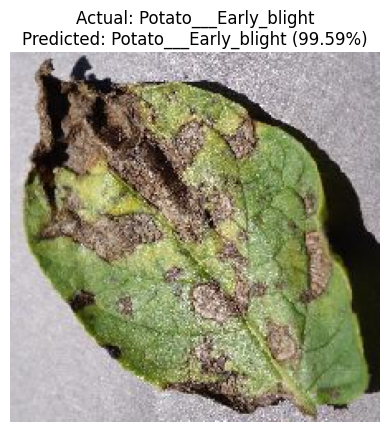

1/1 [==============================] - 0s 41ms/step
Actual Class:    Potato___Late_blight
Predicted Class: Potato___Late_blight
Confidence:      99.81%


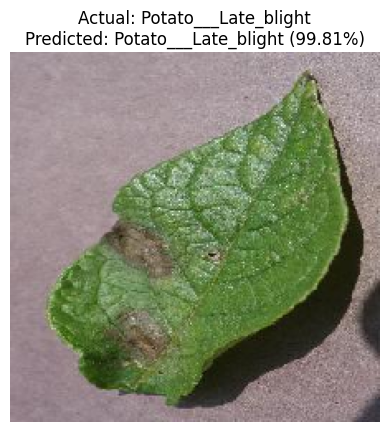

1/1 [==============================] - 0s 41ms/step
Actual Class:    Potato___Early_blight
Predicted Class: Potato___Early_blight
Confidence:      99.81%


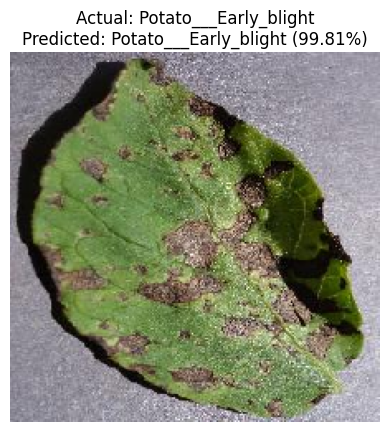

1/1 [==============================] - 0s 59ms/step
Actual Class:    Potato___Late_blight
Predicted Class: Potato___Late_blight
Confidence:      99.80%


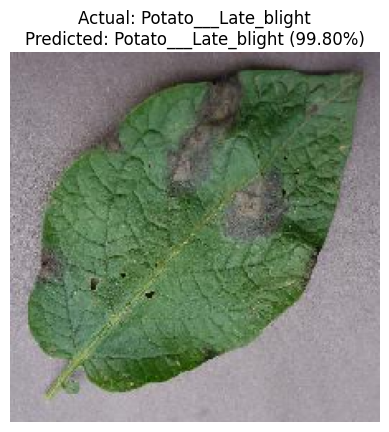

1/1 [==============================] - 0s 39ms/step
Actual Class:    Potato___healthy
Predicted Class: Potato___healthy
Confidence:      99.79%


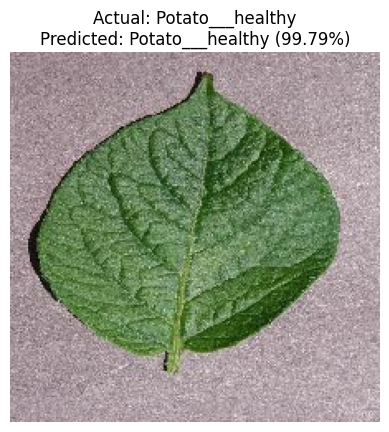

In [54]:
import random
# Define the path to the test dataset directory
test_directory = "C:/minor project/potato_project/dataset/test"

# List all the images in the directory and its subdirectories
all_images = []
for root, dirs, files in os.walk(test_directory):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Ensure you only include image files
            all_images.append(os.path.join(root, file))

# Pick a random image
for _ in range(6):
    random_img_path = random.choice(all_images)
    predict_image(hybrid_model, random_img_path, class_names)

🛠 Step 12: Save the Final Model (.h5)

In [55]:
hybrid_model.save('potato_disease_model.h5')
